<a href="https://colab.research.google.com/github/693080593/research/blob/master/Feed_Type_Stratified_Test_Set_Multi_split_041521_%5B4%5D_XgBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv('/content/Feed Type Effect on Biocrude 041521 Stratified Test.csv')
Original_Oil_Yields = data['Bio-crude Oil Yield']
Original_Features = data.drop('Bio-crude Oil Yield', axis = 1)

data_figure = data.drop('Group', axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data_figure.shape))
data_figure.shape

data_figure[:540:11]


Bio-crude dataset has 521 data points with 17 variables each.


,Algae,Manure,Lignocellulosic Biomass,Model Compounds,Food Waste,Sludge,Municipal Solid Waste,Bioethanol Residue,Plant Seed,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
0,0.000000,0.0,0.0,100.000000,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,98.500000
11,0.000000,0.0,0.0,0.000000,100.0,0.0,0.0,0.0,0.0,72.400000,12.900000,0.00000,0.00000,11.600000,0.000000,3.100000,74.800000
22,0.000000,0.0,100.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,39.50000,20.60000,0.000000,30.200000,1.500000,63.200000
33,0.000000,0.0,0.0,100.000000,0.0,0.0,0.0,0.0,0.0,33.000000,33.000000,16.50000,16.50000,0.000000,0.000000,0.000000,58.100000
44,100.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,19.700000,13.500000,0.00000,0.00000,22.900000,0.000000,7.300000,54.300000
55,0.000000,0.0,0.0,100.000000,0.0,0.0,0.0,0.0,0.0,50.000000,0.000000,0.00000,0.00000,50.000000,0.000000,0.000000,50.100000
66,100.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,53.000000,11.000000,0.00000,0.00000,29.000000,0.000000,7.000000,48.000000
77,100.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,12.620000,28.110000,0.00000,0.00000,26.470000,0.000000,6.220000,45.500000
88,100.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,14.000000,59.000000,0.00000,0.00000,20.000000,0.000000,3.000000,43.700000
99,100.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,35.520000,43.810000,0.00000,0.00000,15.700000,0.000000,4.500000,42.600000


In [ ]:
# MinMaxScale
#from sklearn.preprocessing import MinMaxScaler
#from pandas import DataFrame

#data_MinMax = data2.drop(['Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash','Bio-crude Oil Yield','Group'], axis = 1)

#scaler = MinMaxScaler()

#print(scaler.fit(data_MinMax))

#print(scaler.data_max_)
#print(scaler.data_min_)

#data_MinMax3 = scaler.transform(data_MinMax)

#data_MinMax2 = pd.DataFrame(data = data_MinMax3*100,  columns =["Temperature"])

#print(data_MinMax2)

#Original_Features = pd.concat([data2['Lipid'],data2['Protein'],data2['Cellulose'],data2['Hemicellulose'],data2['Carbohydrate'],data2['Lignin'],data2['Ash'],data_MinMax2, data2['Group']], axis=1)

#data=pd.concat([Original_Features, data2['Bio-crude Oil Yield']], axis=1)

#data_figure_new=data.drop('Group', axis = 1)

#data[:517:11]

#Original_Features[:511:11]

In [2]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [ ]:
# No use.
for j in range(0,201,1):
  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=j)
  
  X_valid_new=X_valid.drop('Group', axis=1)

  Features_new=Features.drop('Group', axis=1)

  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  MRE_train_all=[]
  MRE_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(1,50,1):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    model = XGBRegressor(silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    
  # Predict validation set
  model.fit(Features_new, Oil_Yields)

  y_valid_predict = model.predict(X_valid_new)
  
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  MRE_valid = performance_metric(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("R2 score of valid set", r2_valid)
  print("Max Values of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Testmax-Valid:",max(r2_test_all)-r2_valid)
  print("Difference Values of R2 of training and test sets", np.mean(r2_train_all)-np.mean(r2_test_all))
  print("")
  #print("Mean value of MRE of training set", np.mean(MRE_train_all))
  #print("Mean value of MRE of test set", np.mean(MRE_test_all))
  #print("MRE of valid set:", MRE_valid)
  #print("Min Values of MRE of test set", min(MRE_test_all))
  #print("Standard deviation of MRE of test set", np.std(MRE_test_all))
  #print("Difference Values of MRE of training and test sets", np.mean(MRE_train_all)-np.mean(MRE_test_all))

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

group2 = Original_Features.loc[:,'Group']

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)

X_valid_new=X_valid.drop('Group', axis=1)

Features_new=Features.drop('Group', axis=1)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

for i in range(5000,6000,10):

  X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

  model = XGBRegressor(silent = True)

  model.fit(X_train, y_train)
    
  y_train_predict = model.predict(X_train)
  y_test_predict = model.predict(X_test)

  MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
  MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
  y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
  y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
  r2_train = metrics.r2_score(y_train, y_train_predict)
  r2_test = metrics.r2_score(y_test, y_test_predict)

  MRE_train = performance_metric(y_train, y_train_predict)
  MRE_test = performance_metric(y_test, y_test_predict)

  cnt += 1
  MAE_train_all.append(MAE_train)
  MAE_test_all.append(MAE_test)
  y_train_rmse_all.append(y_train_rmse)
  y_test_rmse_all.append(y_test_rmse)
  r2_train_all.append(r2_train)
  r2_test_all.append(r2_test)
  MRE_train_all.append(MRE_train)
  MRE_test_all.append(MRE_test)

  # For drawing plot
  y_test_list.append(y_test.values)
  y_pred_list.append(y_test_predict)  

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
#print("Value of R2 of test set", r2_test_all)
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

print("")
# Predict validation set
model.fit(Features_new, Oil_Yields)

y_valid_predict = model.predict(X_valid_new)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("MAE of valid set:", MAE_valid)
print("RMSE of valid set:", y_valid_rmse)
print("R2 score of valid set", r2_valid)
print("MRE of valid set:", MRE_valid)

Mean value of MAE of training set 4.4823662319439235
Standard deviation of MAE of training set 0.12037030856300736
Mean value of MAE of test set 7.056149737870171
Standard deviation of MAE of test set 0.5477597999481904

Mean value of RMSE of training set 5.8534766625891415
Standard deviation of RMSE of training set 0.16144169154501975
Mean value of RMSE of test set 9.320654458457819
Standard deviation of RMSE of test set 0.8875678155955061

Mean value of R2 of training set 0.887755326876592
Standard deviation of R2 of training set 0.007651349737644005
Mean value of R2 of test set 0.7028444696149474
Standard deviation of R2 of test set 0.07623359453495142

Mean value of MRE of training set 0.15076144163442778
Standard deviation of MRE of training set 0.004639186456874886
Mean value of MRE of test set 0.23902131775110874
Standard deviation of MRE of test set 0.0237772879755071

MAE of valid set: 6.3664905607992335
RMSE of valid set: 8.362140312068908
R2 score of valid set 0.769764785090

Text(0.5, 1.0, 'y_pred vs. y_true')

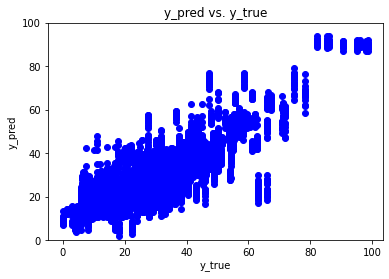

In [ ]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_XGBoost.csv', index = False, header=True)

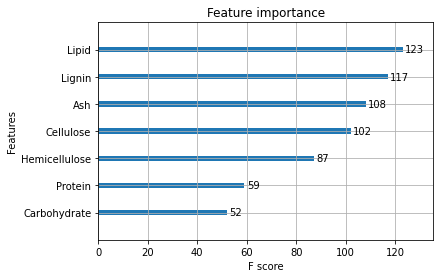

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

plot_importance(model)
plt.show()

Text(0.5, 1.0, 'y_pred vs. y_true')

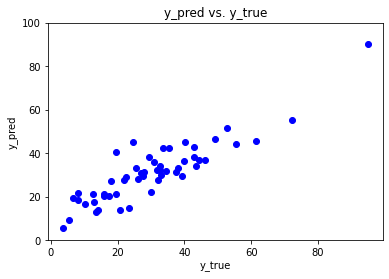

In [ ]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
# n_estimators 参数的最佳取值(10, 200, 11)

for j in range(10, 200, 10):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': j, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# max_depth 参数的最佳取值(1, 20, 10)

for j in range(1, 20, 1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': j, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# min_child_weight 参数的最佳取值(1, 10, 10)

for j in range(0,11,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 4, 'min_child_weight': j,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# gamma 参数的最佳取值(0, 0.2, 11)

for j in range(0,21,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': j/100, 'max_depth': 4, 'min_child_weight': 4,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# subsample 参数的最佳取值(0, 1, 11)

for j in range(5990,6010,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 4,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': j/10000, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j/10000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# colsample_bytree 参数的最佳取值(0, 1, 11)

for j in range(0,11,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 4,
                'colsample_bytree': j/10, 'colsample_bylevel': 1, 'subsample': 0.6002, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j/10)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# reg_lambda 参数的最佳取值(0, 1, 11)

for j in range(9680,9700,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 4,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6002, 'reg_lambda': j/10000, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j/10000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# reg_alpha 参数的最佳取值(0, 1, 11)

for j in range(0,11,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 4,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6002, 'reg_lambda': 0.9693, 'reg_alpha': j/10,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j/10)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# eta 参数的最佳取值(-2, 0, 10)

for j in range(0,10,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': j/100, 'n_estimators': 50, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 4,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6002, 'reg_lambda': 0.9693, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# seed 参数的最佳取值(0, 100, 1)

for j in range(0,99,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 4,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6002, 'reg_lambda': 0.9693, 'reg_alpha': 0,
                'seed': j}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [3]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

group2 = Original_Features.loc[:,'Group']

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)

X_valid_new=X_valid.drop('Group', axis=1)

Features_new=Features.drop('Group', axis=1)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

for i in range(5000,6000,10):

  X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

  other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 4,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6002, 'reg_lambda': 0.9693, 'reg_alpha': 0,
                'seed': 33}

  model = XGBRegressor(**other_params,silent = True)

  model.fit(X_train, y_train)
    
  y_train_predict = model.predict(X_train)
  y_test_predict = model.predict(X_test)

  MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
  MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
  y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
  y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
  r2_train = metrics.r2_score(y_train, y_train_predict)
  r2_test = metrics.r2_score(y_test, y_test_predict)

  MRE_train = performance_metric(y_train, y_train_predict)
  MRE_test = performance_metric(y_test, y_test_predict)

  cnt += 1
  MAE_train_all.append(MAE_train)
  MAE_test_all.append(MAE_test)
  y_train_rmse_all.append(y_train_rmse)
  y_test_rmse_all.append(y_test_rmse)
  r2_train_all.append(r2_train)
  r2_test_all.append(r2_test)
  MRE_train_all.append(MRE_train)
  MRE_test_all.append(MRE_test)

  # For drawing plot
  y_test_list.append(y_test.values)
  y_pred_list.append(y_test_predict)  

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
#print("Value of R2 of test set", r2_test_all)
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

print("")
# Predict validation set
model.fit(Features_new, Oil_Yields)

y_valid_predict = model.predict(X_valid_new)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("MAE of valid set:", MAE_valid)
print("RMSE of valid set:", y_valid_rmse)
print("R2 score of valid set", r2_valid)
print("MRE of valid set:", MRE_valid)

Mean value of MAE of training set 4.7312375872265156
Standard deviation of MAE of training set 0.13612477725080688
Mean value of MAE of test set 6.84342568138626
Standard deviation of MAE of test set 0.5280196177258322

Mean value of RMSE of training set 6.252295088804634
Standard deviation of RMSE of training set 0.1629426712959031
Mean value of RMSE of test set 8.956238995024808
Standard deviation of RMSE of test set 0.770848659470914

Mean value of R2 of training set 0.8711185168504404
Standard deviation of R2 of training set 0.009421943238565786
Mean value of R2 of test set 0.723972581350106
Standard deviation of R2 of test set 0.06456672982961281

Mean value of MRE of training set 0.1582342594080174
Standard deviation of MRE of training set 0.004907703548692283
Mean value of MRE of test set 0.22963715049702124
Standard deviation of MRE of test set 0.01978218969741712

MAE of valid set: 5.9634102333496095
RMSE of valid set: 7.369704510447157
R2 score of valid set 0.8169644606099243

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_XGBoost_opt.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

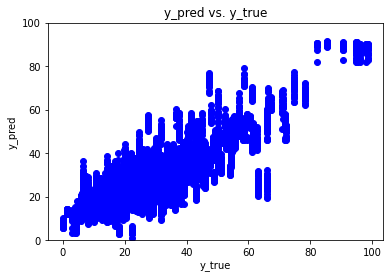

In [4]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

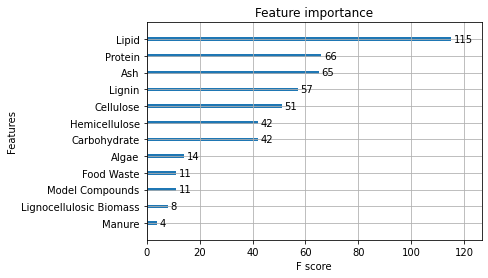

In [5]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

plot_importance(model)
plt.show()

Text(0.5, 1.0, 'y_pred vs. y_true')

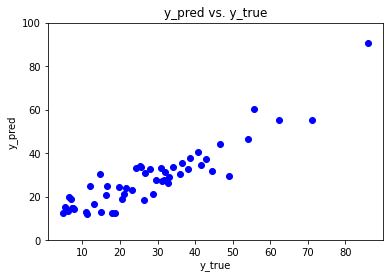

In [6]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')